# Cairo House Price Prediction

## 1.Introduction
The goal of this project is to predict house prices in Cairo using machine learning.
We aim to identify key factors affecting property prices and provide a predictive tool for investors and buyers.

## 2. Imports and Setup


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/CairoHousePrices/properties.csv'
df = pd.read_csv(file_path)
df.head()

,type,title,location,bedroom,bathroom,size_sqm,price
0,Duplex,Prime Location Duplex Fully Finished With A\C,"Park View, North Investors Area, New Cairo Cit...",4,4,345,"6,850,000"
1,Villa,Town house resale at Mivida Emaar with best price,"Mivida, 5th Settlement Compounds, The 5th Sett...",3,3,285,"10,000,000"
2,Apartment,Lake View Residence - Apartment | Prime Location,"Lake View Residence, 5th Settlement Compounds,...",3,3,210,"5,700,000"
3,Townhouse,Best Penthouse for sale in villette ( sky conds ),"La Vista City, New Capital Compounds, New Capi...",4,4,230,"7,510,000"
4,Penthouse,2nd Floor | Fully Finished | Lowest Price |Par...,"Villette, 5th Settlement Compounds, The 5th Se...",5,6,284,"8,511,300"


## 3. Data Overview
Check the basic structure of the dataset:

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11418 entries, 0 to 11417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      11418 non-null  object
 1   title     11418 non-null  object
 2   location  11418 non-null  object
 3   bedroom   11418 non-null  object
 4   bathroom  11418 non-null  int64 
 5   size_sqm  11418 non-null  object
 6   price     11418 non-null  object
dtypes: int64(1), object(6)
memory usage: 624.6+ KB


,type,title,location,bedroom,bathroom,size_sqm,price
0,Duplex,Prime Location Duplex Fully Finished With A\C,"Park View, North Investors Area, New Cairo Cit...",4,4,345,"6,850,000"
1,Villa,Town house resale at Mivida Emaar with best price,"Mivida, 5th Settlement Compounds, The 5th Sett...",3,3,285,"10,000,000"
2,Apartment,Lake View Residence - Apartment | Prime Location,"Lake View Residence, 5th Settlement Compounds,...",3,3,210,"5,700,000"
3,Townhouse,Best Penthouse for sale in villette ( sky conds ),"La Vista City, New Capital Compounds, New Capi...",4,4,230,"7,510,000"
4,Penthouse,2nd Floor | Fully Finished | Lowest Price |Par...,"Villette, 5th Settlement Compounds, The 5th Se...",5,6,284,"8,511,300"


In [ ]:
df.shape

(11418, 7)

The dataset contains 11,418 rows and 7 columns. Some columns are non-numeric and require preprocessing.


##4. Data Cleaning
- Standardize Text Columns and fix property types
- clean numeric columns and convert them to dtype numeric

In [ ]:
df2 = df.copy()

In [ ]:
cols = ['title', 'type', 'location']

for col in cols:
    df2[col] = df2[col].str.lower().str.strip()


In [ ]:
df2.type.unique()

array(['duplex', 'villa', 'apartment', 'townhouse', 'penthouse', 'ivilla',
       'twin house', 'hotel apartment', 'chalet', 'compound'],
      dtype=object)

In [ ]:
df2['type'] = df2['type'].replace({'ivilla':'villa'})

In [ ]:
df2["bedroom"].unique()

array(['4', '3', '5', '2', '1', '7', '6', '8', 'Studio', '{0}'],
      dtype=object)

In [ ]:
df2["bedroom"] = df2["bedroom"].replace({"Studio": 1, "{0}": 0})
df2["bedroom"] = pd.to_numeric(df2["bedroom"])

In [ ]:
df2["size_sqm"].unique()

array(['345', '285', '210', '230', '284', '172', '250', '220', '114',
       '204', '327', '330', '235', '777', '124', '185', '165', '465',
       '320', '136', '125', '206', '258', '207', '144', '142', '164',
       '344', '287', '156', '216', '260', '248', '530', '179', '95',
       '199', '283', '278', '187', '166', '160', '205', '190', '209',
       '194', '168', '157', '305', '129', '316', '800', '161', '126',
       '133', '150', '208', '180', '195', '163', '171', '69', '193',
       '240', '266', '140', '281', '545', '183', '211', '175', '170',
       '424', '122', '360', '370', '508', '108', '139', '192', '365',
       '146', '390', '174', '400', '295', '280', '200', '60', '130',
       '300', '500', '475', '420', '145', '176', '472', '540', '226',
       '313', '188', '375', '63', '128', '215', '409', '850', '177',
       '355', '152', '169', '384', '158', '217', '191', '155', '388',
       '138', '167', '294', '484', '387', '676', '251', '311', '270',
       '225', '308', '17

In [ ]:
df2["size_sqm"] = df2["size_sqm"].str.replace(',', '').astype(int)

In [ ]:
df2["price"].unique()

array(['6,850,000', '10,000,000', '5,700,000', ..., '1,837,500',
       '10,276,891', '4,554,066'], dtype=object)

In [ ]:
df2[~df2['price'].str.replace(',', '').str.isnumeric()]['price'].unique()

array(['Ask'], dtype=object)

In [ ]:
df2 =df2[df2['price'] != 'Ask']
df2["price"] = df2["price"].str.replace(',', '').astype(int)

##5. Exploratory Data Analysis (EDA)

In [ ]:
df2.describe()

,bedroom,bathroom,size_sqm,price
count,11006.000000,11006.000000,1.100600e+04,1.100600e+04
mean,3.441214,3.322097,1.188999e+04,6.966221e+06
std,1.181159,1.309566,4.466133e+05,9.192306e+06
min,0.000000,1.000000,1.000000e+00,1.000000e+06
25%,3.000000,2.000000,1.650000e+02,2.500000e+06
50%,3.000000,3.000000,2.200000e+02,4.070000e+06
75%,4.000000,4.000000,3.260000e+02,8.000000e+06
max,8.000000,8.000000,2.665000e+07,4.182527e+08


In [ ]:
df2.isnull().sum()

,0
type,0
title,0
location,0
bedroom,0
bathroom,0
size_sqm,0
price,0


In [ ]:
df2.duplicated().sum()

np.int64(298)

In [ ]:
df2 = df2.drop_duplicates()

Histograms

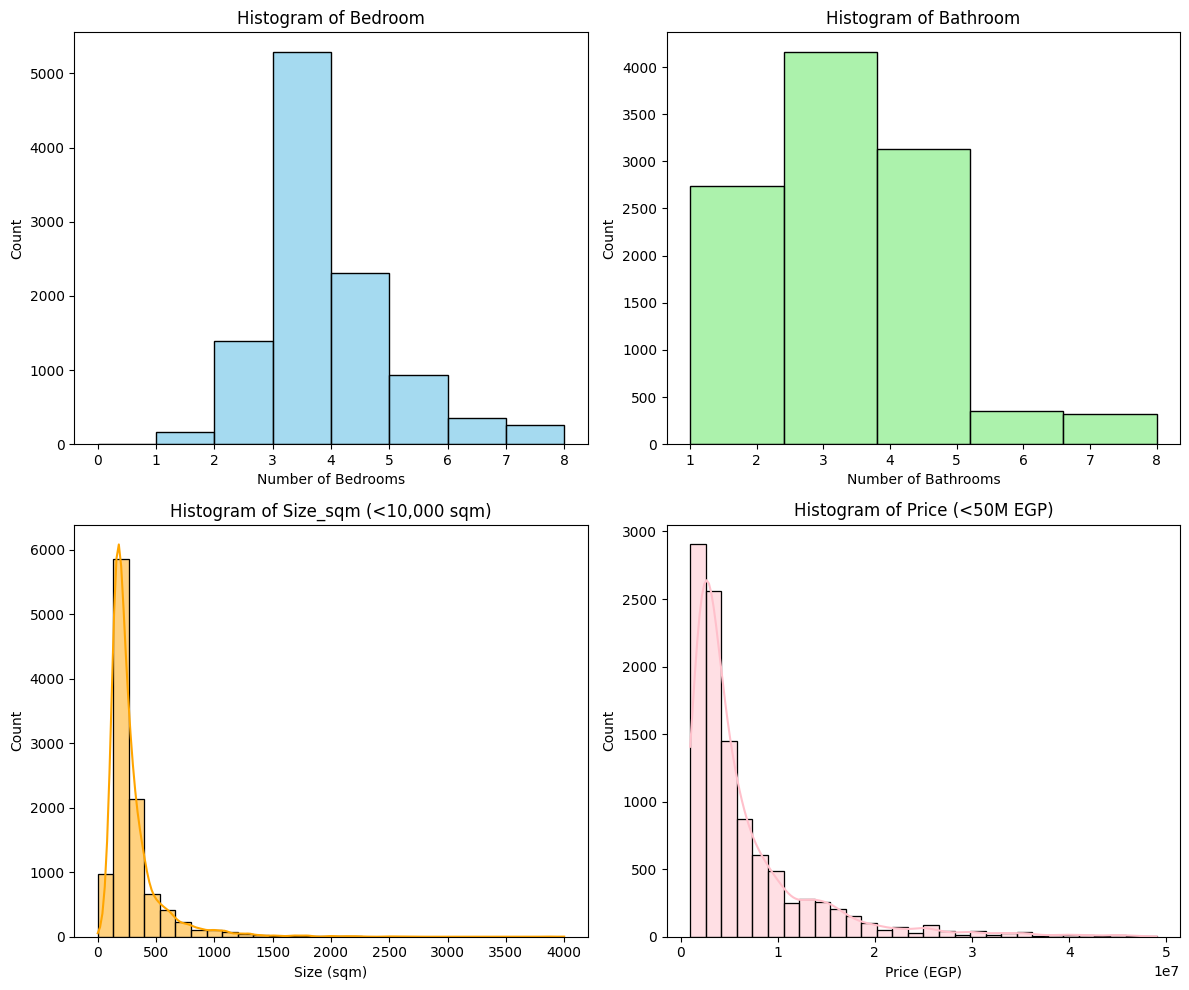

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.histplot(df2['bedroom'], bins=8, kde=False, color='skyblue')
plt.title('Histogram of Bedroom')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

plt.subplot(2,2,2)
sns.histplot(df2['bathroom'], bins=5, kde=False, color='lightgreen')
plt.title('Histogram of Bathroom')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

plt.subplot(2,2,3)
sns.histplot(df2[df2['size_sqm']<10000]['size_sqm'], bins=30, kde=True, color='orange')
plt.title('Histogram of Size_sqm (<10,000 sqm)')
plt.xlabel('Size (sqm)')
plt.ylabel('Count')

plt.subplot(2,2,4)
sns.histplot(df2[df2['price']<50000000]['price'], bins=30, kde=True, color='pink')
plt.title('Histogram of Price (<50M EGP)')
plt.xlabel('Price (EGP)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Both price and size_sqm show a **high right-skewed** distribution, indicating that most properties have low to medium values while a few have very high values. This pattern is expected in the real estate market because luxury and very large properties are relatively rare compared to smaller or more affordable ones. When building models, this skewness should be considered, for example, by applying a **logarithmic transformation** to improve prediction performance.

Boxplots

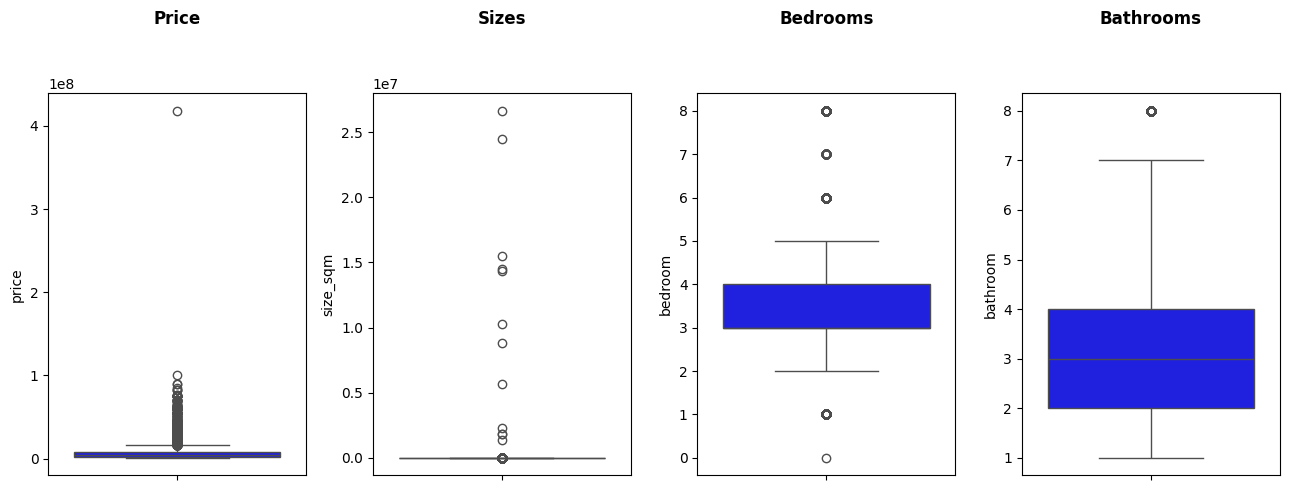

In [ ]:
plt.figure(figsize=(13,5))

plt.subplot(1,4,1)
sns.boxplot(df2["price"],color="blue")
plt.title("Price" ,fontweight="black",pad=50,size=12)
plt.tight_layout()

plt.subplot(1,4,2)
sns.boxplot(df2["size_sqm"],color="blue")
plt.title("Sizes" ,fontweight="black",pad=50,size=12)
plt.tight_layout()

plt.subplot(1,4,3)
sns.boxplot(df2["bedroom"],color="blue")
plt.title("Bedrooms" ,fontweight="black",pad=50,size=12)
plt.tight_layout()

plt.subplot(1,4,4)
sns.boxplot(df2["bathroom"],color="blue")
plt.title("Bathrooms" ,fontweight="black",pad=50,size=12)
plt.tight_layout()

##6. Outlier Handling and Feature Engineering
Clip Extreme Values and Create Price per Square Meter

In [ ]:
df3 = df2.copy()
lower = df3['price'].quantile(0.01)
upper = df3['price'].quantile(0.99)
df3['price'] = df3['price'].clip(lower, upper)

lower = df3['size_sqm'].quantile(0.01)
upper = df3['size_sqm'].quantile(0.99)
df3['size_sqm'] = df3['size_sqm'].clip(lower, upper)


In [ ]:
df3['price_per_sqm'] = df3['price'] / df3['size_sqm']

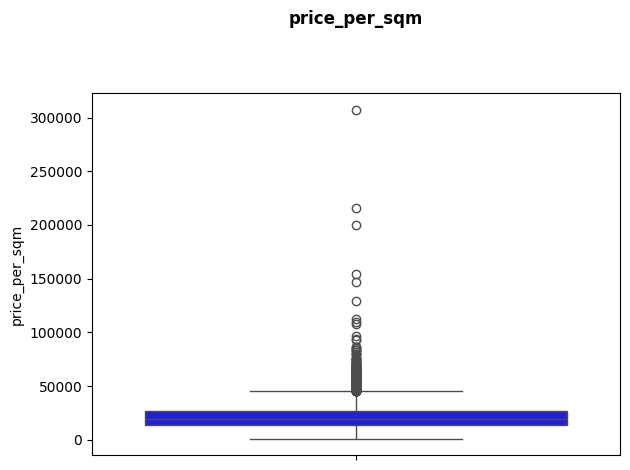

In [ ]:
sns.boxplot(df3["price_per_sqm"],color="blue")
plt.title("price_per_sqm" ,fontweight="black",pad=50,size=12)
plt.tight_layout()

In [ ]:
lower = df3['price_per_sqm'].quantile(0.01)
upper = df3['price_per_sqm'].quantile(0.99)
df3['price_per_sqm'] = df3['price_per_sqm'].clip(lower, upper)

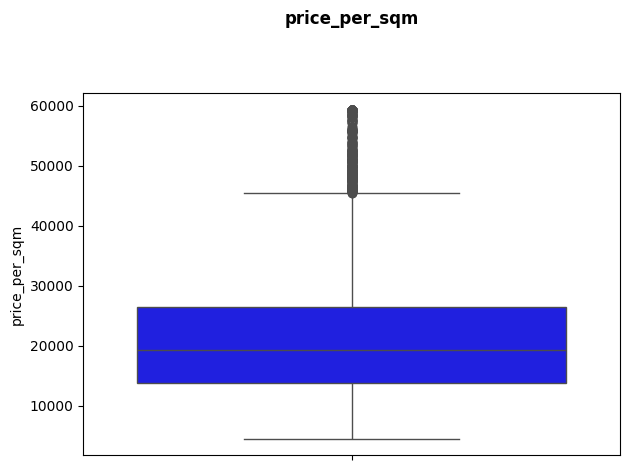

In [ ]:
sns.boxplot(df3["price_per_sqm"],color="blue")
plt.title("price_per_sqm" ,fontweight="black",pad=50,size=12)
plt.tight_layout()

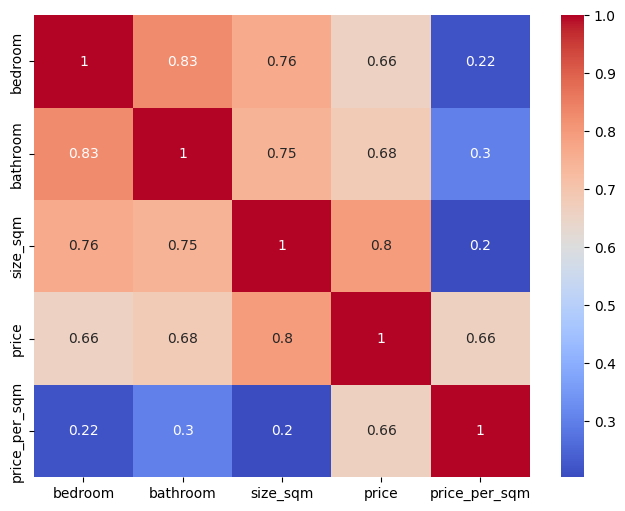

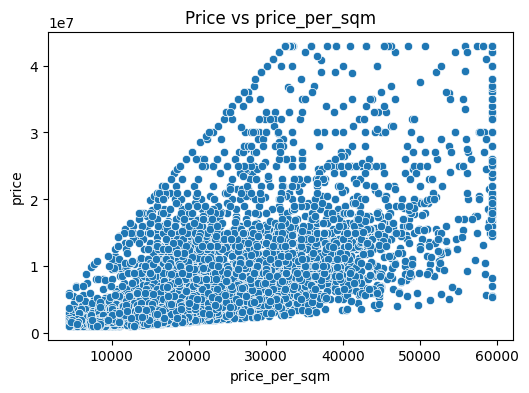

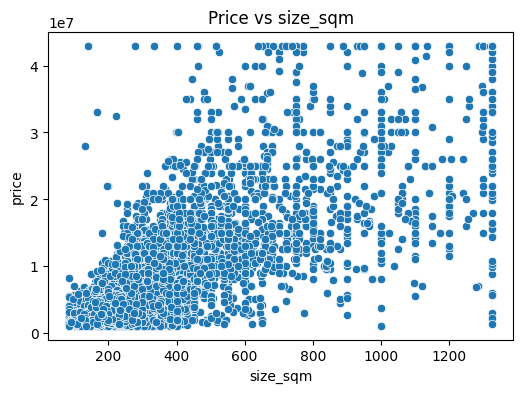

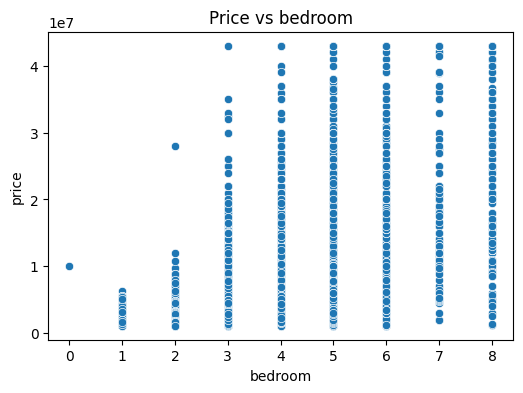

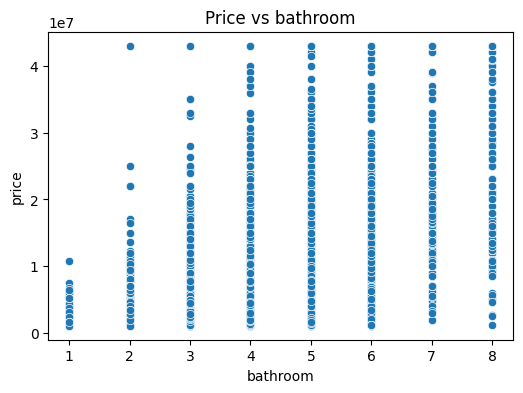

In [ ]:
# Correlation Matrix
plt.figure(figsize=(8,6))
numeric_cols = df3.select_dtypes(include='number').columns
sns.heatmap(df3[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()
# Scatter Plots between columns and price
numeric_cols = ['price', 'price_per_sqm', 'size_sqm', 'bedroom', 'bathroom']

for col in numeric_cols:
    if col != 'price':
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df3, x=col, y='price')
        plt.title(f'Price vs {col}')
        plt.show()

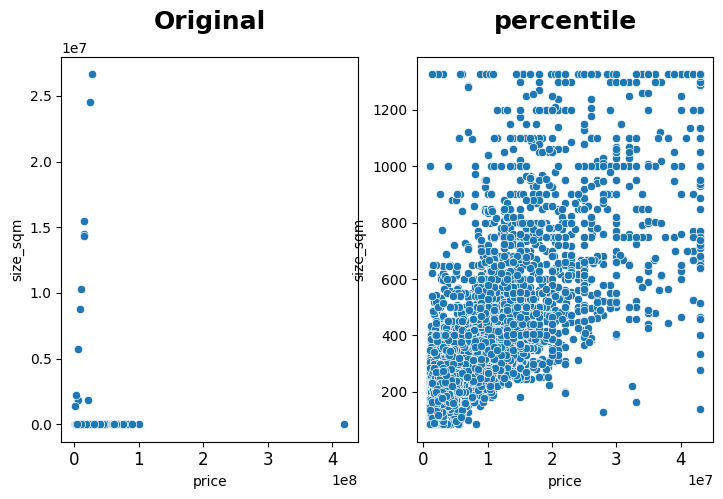

In [ ]:
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
sns.scatterplot(x="price", y="size_sqm", data=df2)
plt.title("Original", fontweight="black", pad=20, size=18)
plt.xticks(fontsize=12)
plt.subplot(1,3,2)
sns.scatterplot(x="price", y="size_sqm", data=df3)
plt.title("percentile", fontweight="black", pad=20, size=18)
plt.xticks(fontsize=12)
plt.show()


In [ ]:
df2.skew(numeric_only=True)

,0
bedroom,1.309462
bathroom,1.091042
size_sqm,45.553660
price,11.136174


In [ ]:
df3.skew(numeric_only=True)

,0
bedroom,1.309462
bathroom,1.091042
size_sqm,2.595925
price,2.685800
price_per_sqm,1.136898


skewness of size_sqm and price is high, we use log transform

###Log Transformation
This reduces skewness and improves model performance

In [ ]:
df3['price'] = np.log1p(df3['price'])
df3['size_sqm'] = np.log1p(df3['size_sqm'])
df3.skew(numeric_only=True)

,0
bedroom,1.309462
bathroom,1.091042
size_sqm,0.872711
price,0.539682
price_per_sqm,1.136898


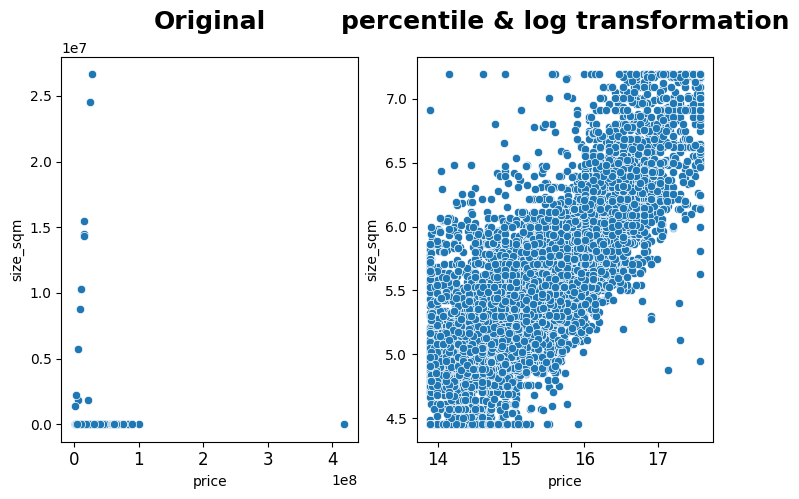

In [ ]:
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
sns.scatterplot(x="price", y="size_sqm", data=df2)
plt.title("Original", fontweight="black", pad=20, size=18)
plt.xticks(fontsize=12)
plt.subplot(1,3,2)
sns.scatterplot(x="price", y="size_sqm", data=df3)
plt.title("percentile & log transformation", fontweight="black", pad=20, size=18)
plt.xticks(fontsize=12)
plt.show()


##One hot encoding
Some categorical columns have a very high number of unique values. For example, the location column contains many distinct entries. Applying one-hot encoding directly would create too many columns, which can lead to high dimensionality and increase the risk of overfitting.  

To handle this, we can:  
Replace categories with a count less than 10 with a new category called Other.  
Perform one-hot encoding on the modified categorical columns.  


In [ ]:
df4 = df3.copy()

In [ ]:
len(df4.location.unique())

785

In [ ]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
"hyde park, 5th settlement compounds, the 5th settlement, new cairo city, cairo",589
"madinaty, cairo",569
"mivida, 5th settlement compounds, the 5th settlement, new cairo city, cairo",566
"villette, 5th settlement compounds, the 5th settlement, new cairo city, cairo",362
"mountain view hyde park, 5th settlement compounds, the 5th settlement, new cairo city, cairo",342
...,...
"mohamed al makdessi st., rehab city sixth phase, al rehab, new cairo city, cairo",1
"mohamed ahmed ibrahim st., 8th zone, nasr city, cairo",1
"moez al dawla st., el banafseg 6, el banafseg, new cairo city, cairo",1


In [ ]:
len(location_stats[location_stats <= 10])

647

In [ ]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

,location
location,
"al patio 5, el patio, el shorouk compounds, shorouk city, cairo",10
"mohamed mazhar st., zamalek, cairo",10
"fountain park, 5th settlement compounds, the 5th settlement, new cairo city, cairo",10
"fountain side, uptown cairo, mokattam, cairo",10
"hayah residence, north teseen st., the 5th settlement, new cairo city, cairo",10
...,...
"mohamed al makdessi st., rehab city sixth phase, al rehab, new cairo city, cairo",1
"mohamed ahmed ibrahim st., 8th zone, nasr city, cairo",1
"moez al dawla st., el banafseg 6, el banafseg, new cairo city, cairo",1


In [ ]:
len(df4.location.unique())

785

In [ ]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

139

In [ ]:
location_type_dummies = pd.get_dummies(df4[['location', 'type']], dtype=int)
df5 = df4.drop(['title', 'location', 'type'], axis=1)
df5 = pd.concat([df5, location_type_dummies], axis=1)
df5.head()

,bedroom,bathroom,size_sqm,price,price_per_sqm,"location_2nd sector, zahraa el maadi, hay el maadi, cairo","location_90 avenue, south investors area, new cairo city, cairo","location_abbas al akkad st., 1st zone, nasr city, cairo","location_al andalus buildings, al andalus district, new cairo city, cairo","location_al andalus el gedida, al andalus district, new cairo city, cairo",...,"location_zed east, 5th settlement compounds, the 5th settlement, new cairo city, cairo",type_apartment,type_chalet,type_compound,type_duplex,type_hotel apartment,type_penthouse,type_townhouse,type_twin house,type_villa
0,4,4,5.846439,15.739759,19855.072464,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,3,5.655992,16.118096,35087.719298,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,3,5.351858,15.555977,27142.857143,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,4,5.442418,15.831746,32652.173913,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,6,5.652489,15.956905,29969.366197,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Dummy Variable Trap:  
One-hot encoding creates linearly dependent columns. Drop one to avoid issues.

In [ ]:
df5 = df5.drop(['type_apartment', 'location_other'], axis=1)
df5.head()

,bedroom,bathroom,size_sqm,price,price_per_sqm,"location_2nd sector, zahraa el maadi, hay el maadi, cairo","location_90 avenue, south investors area, new cairo city, cairo","location_abbas al akkad st., 1st zone, nasr city, cairo","location_al andalus buildings, al andalus district, new cairo city, cairo","location_al andalus el gedida, al andalus district, new cairo city, cairo",...,"location_yaru new capital compound, new capital compounds, new capital city, cairo","location_zed east, 5th settlement compounds, the 5th settlement, new cairo city, cairo",type_chalet,type_compound,type_duplex,type_hotel apartment,type_penthouse,type_townhouse,type_twin house,type_villa
0,4,4,5.846439,15.739759,19855.072464,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,3,5.655992,16.118096,35087.719298,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,3,5.351858,15.555977,27142.857143,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,5.442418,15.831746,32652.173913,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,6,5.652489,15.956905,29969.366197,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


##7- Modeling

In [ ]:
X = df5.drop('price', axis=1)
y = df5['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1, max_iter=10000, random_state=42),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))
    results.append({'Model': name, 'Train R2': train_r2, 'Test R2': test_r2})

results_df = pd.DataFrame(results)
print(results_df)


               Model  Train R2   Test R2
0  Linear Regression  0.967129  0.961333
1              Lasso  0.932625  0.929860
2              Ridge  0.967129  0.961337
3      Decision Tree  0.998880  0.995837
4      Random Forest  0.999469  0.997618
5  Gradient Boosting  0.999288  0.997386


In [ ]:
from sklearn.model_selection import cross_val_score
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    cv_results[name] = {'R2_mean': mean_score, 'R2_std': std_score}
    print(f"{name} -> R2 mean: {mean_score:.4f}, R2 std: {std_score:.4f}, Scores: {scores}")

Linear Regression -> R2 mean: 0.9658, R2 std: 0.0036, Scores: [0.96228386 0.96674965 0.97187901 0.9620192  0.96613076]
Lasso -> R2 mean: 0.9325, R2 std: 0.0054, Scores: [0.92567922 0.93397451 0.9403464  0.9270807  0.93539202]
Ridge -> R2 mean: 0.9658, R2 std: 0.0036, Scores: [0.96227688 0.96675444 0.97187996 0.96202245 0.96613009]
Decision Tree -> R2 mean: 0.9942, R2 std: 0.0012, Scores: [0.99306695 0.99465996 0.99615929 0.99290825 0.99406477]
Random Forest -> R2 mean: 0.9975, R2 std: 0.0008, Scores: [0.99622048 0.99709228 0.9976531  0.99821112 0.99849886]
Gradient Boosting -> R2 mean: 0.9973, R2 std: 0.0007, Scores: [0.99596626 0.99703912 0.99772102 0.99748756 0.99814924]


### Model Selection

After evaluating all candidate models using both train-test split and 5-fold cross-validation, Random Forest emerged as the best choice. It achieved the highest mean R² along with a very low standard deviation (0.0008) across folds, indicating both high predictive performance and stability. Additionally, the close agreement between training and test R² scores suggests that the model generalizes well without significant overfitting.

Therefore, Random Forest is selected as the final model for predicting house prices.

/tmp/ipython-input-3511087348.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='magma')


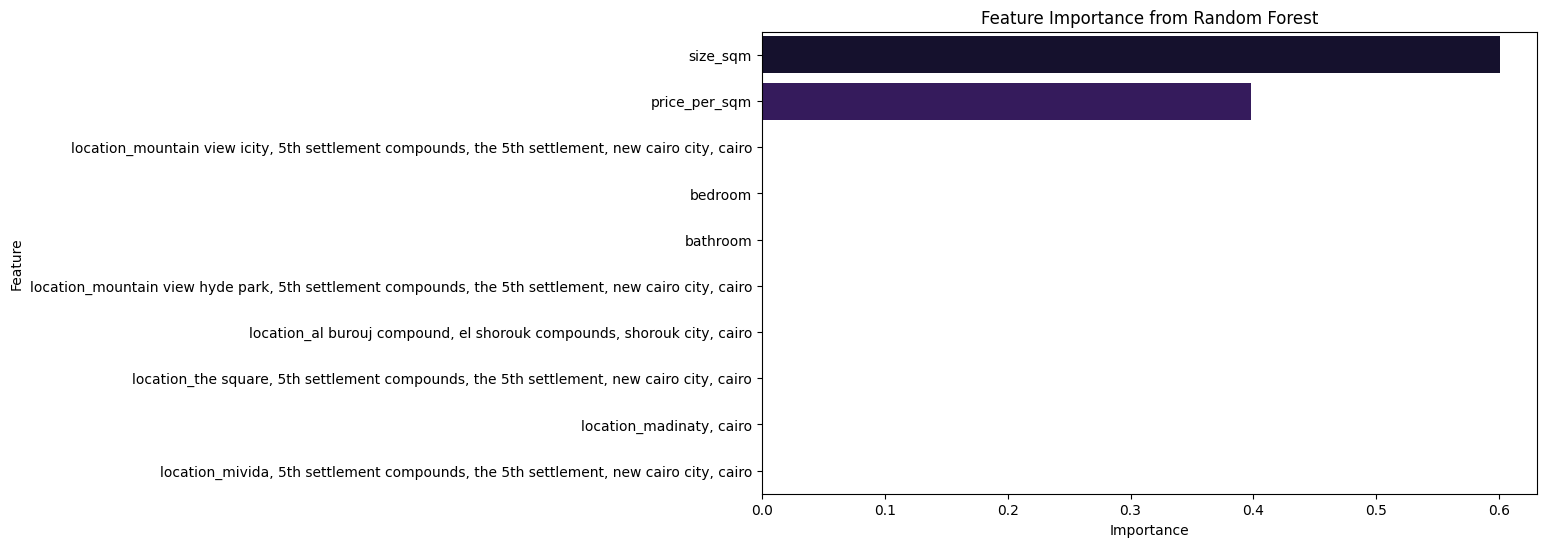

                                               Feature  Importance
2                                             size_sqm    0.600522
3                                        price_per_sqm    0.397933
95   location_mountain view icity, 5th settlement c...    0.000496
0                                              bedroom    0.000221
1                                             bathroom    0.000179
..                                                 ...         ...
10   location_al katameya plaza, the 1st settlement...    0.000000
53   location_green square, mostakbal city compound...    0.000000
88   location_moon valley 2, ext north inves area, ...    0.000000
107  location_porto new cairo, 5th settlement compo...    0.000000
143                                      type_compound    0.000000

[150 rows x 2 columns]


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Feature Importance
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_features = feat_imp_df.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='magma')
plt.title('Feature Importance from Random Forest')
plt.show()

print(feat_imp_df)

In [ ]:
print("R2 Test:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R2 Test: 0.9976180890594802
MAE: 0.015990882050425804
RMSE: 0.0015905573755804656


### Conclusion

The Random Forest model was selected as the final model due to its highest predictive performance (Train R² =  0.999469 , Test R² 0.997618 , cross validation 5 folds mean R² = 0.9975) and stability across folds ( std = 0.0008).

The evaluation shows that the model generalizes well, with training and test scores closely aligned, indicating minimal overfitting.

Feature importance analysis revealed that the most influential factors affecting house prices are Price per sqm, Size sqm.

Overall, the model provides a reliable and accurate tool for predicting house prices in Cairo.